In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet , Lasso , Ridge, LinearRegression
pd.set_option('display.max_columns',50)

# Step 1: DATA PREPROCESSING
### 1A : IMPORTING THE DATA SET

In [2]:
df=pd.read_csv('suicide.csv')
df.head(6)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


In [3]:
df.shape

(27820, 12)

### 1B : ANALYZING MISSING VALUES

In [4]:
#percentage of missing valwues
df.isnull().sum()*100/len(df)

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

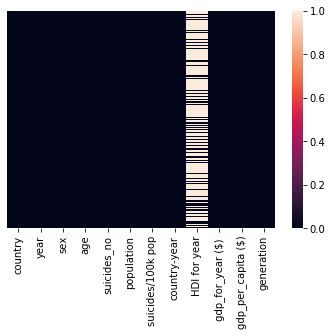

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [7]:
df['HDI for year'].value_counts()

0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
         ..
0.614    12
0.728    12
0.522    12
0.879    12
0.924    12
Name: HDI for year, Length: 305, dtype: int64

In [8]:
print("the last 10 rows of the dataframe/n")
df.tail(10)

the last 10 rows of the dataframe/n


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [10]:
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [10]:
X = df.drop('suicides_no' , axis = 1) #Setting the features aside in the variable X
y = df['suicides_no'] #Setting the target aside in variable y

X.head(5)

,country,year,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [11]:
df.to_csv("suicide.csv", index=False)

In [12]:
df.dtypes
print(df.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [14]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [15]:
df.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Iceland,NaN,male,15-24 years,NaN,NaN,NaN,Denmark2007,NaN,"40,429,734,400",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


In [16]:
df[[ 'year', 'suicides_no']].describe()

,year,suicides_no
count,27820.000000,27820.000000
mean,2001.258375,242.574407
std,8.469055,902.047917
min,1985.000000,0.000000
25%,1995.000000,3.000000
50%,2002.000000,25.000000
75%,2008.000000,131.000000
max,2016.000000,22338.000000


In [17]:

len(df.columns)

12

In [18]:
missing_data = df.isnull()
missing_data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False


# Step 2: Data Analysis
Lets start by deal with the Numeric Variables first.



# Analyzing Numeric Variables

In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

country
False    27820
Name: country, dtype: int64

year
False    27820
Name: year, dtype: int64

sex
False    27820
Name: sex, dtype: int64

age
False    27820
Name: age, dtype: int64

suicides_no
False    27820
Name: suicides_no, dtype: int64

population
False    27820
Name: population, dtype: int64

suicides/100k pop
False    27820
Name: suicides/100k pop, dtype: int64

country-year
False    27820
Name: country-year, dtype: int64

HDI for year
True     19456
False     8364
Name: HDI for year, dtype: int64

 gdp_for_year ($) 
False    27820
Name:  gdp_for_year ($) , dtype: int64

gdp_per_capita ($)
False    27820
Name: gdp_per_capita ($), dtype: int64

generation
False    27820
Name: generation, dtype: int64



In [32]:
avg_suicides_loss = df["suicides_no"].astype("float").mean(axis=0)
print("Average of suicides_no:", avg_suicides_loss)

Average of suicides_no: 242.57440690150972


In [33]:
df["suicides_no"].replace(np.nan,avg_suicides_loss,inplace=True)

In [48]:
avg_suicides=df['suicides/100k pop'].astype('float').mean(axis=0)
print("Average of suicides:", avg_suicides)

Average of suicides: 12.816097411933894


In [42]:
avg_HDI = df["HDI for year"].astype("float").mean(axis = 0)
print("Average of HDI:", avg_HDI)

df["HDI for year"].replace(np.nan, avg_HDI, inplace=True)


Average of HDI: 0.7766011477761279


In [41]:
avg_popu=df["population"].astype("float").mean(axis=0)
print("Average of population:",avg_popu)
df["population"].replace(np.nan,avg_popu,inplace=True)

Average of population: 1844793.6173975556


In [54]:
df.head(100)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albania,1996,female,5-14 years,1,354100,0.28,Albania1996,0.776601,"3,314,898,292",1127,Millenials
96,Albania,1997,male,25-34 years,36,236000,15.25,Albania1997,0.776601,"2,359,903,108",793,Generation X
97,Albania,1997,male,15-24 years,33,244400,13.50,Albania1997,0.776601,"2,359,903,108",793,Generation X
98,Albania,1997,male,75+ years,3,25400,11.81,Albania1997,0.776601,"2,359,903,108",793,G.I. Generation


In [55]:
df.tail(100)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27720,Uzbekistan,2003,female,55-74 years,31,877339,3.53,Uzbekistan2003,0.776601,"10,128,112,401",441,Silent
27721,Uzbekistan,2003,female,35-54 years,77,2675118,2.88,Uzbekistan2003,0.776601,"10,128,112,401",441,Boomers
27722,Uzbekistan,2003,male,5-14 years,45,3219722,1.40,Uzbekistan2003,0.776601,"10,128,112,401",441,Millenials
27723,Uzbekistan,2003,female,5-14 years,11,3085543,0.36,Uzbekistan2003,0.776601,"10,128,112,401",441,Millenials
27724,Uzbekistan,2004,male,35-54 years,350,2639741,13.26,Uzbekistan2004,0.776601,"12,030,023,548",516,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z


In [20]:
#Lets curve out the numeric variables and thereby form the numeric only dataframe 

numeric_features = [cols for cols in X.columns if (X[cols].dtype != 'O' and cols != 'Id')]

numeric_df = X[numeric_features]

numeric_df.head(5)

,year,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1987,312900,6.71,NaN,796
1,1987,308000,5.19,NaN,796
2,1987,289700,4.83,NaN,796
3,1987,21800,4.59,NaN,796
4,1987,274300,3.28,NaN,796


In [21]:
(numeric_df.isnull().sum() / len(numeric_df)) * 100 #checking the percentage

year                   0.000000
population             0.000000
suicides/100k pop      0.000000
HDI for year          69.935298
gdp_per_capita ($)     0.000000
dtype: float64

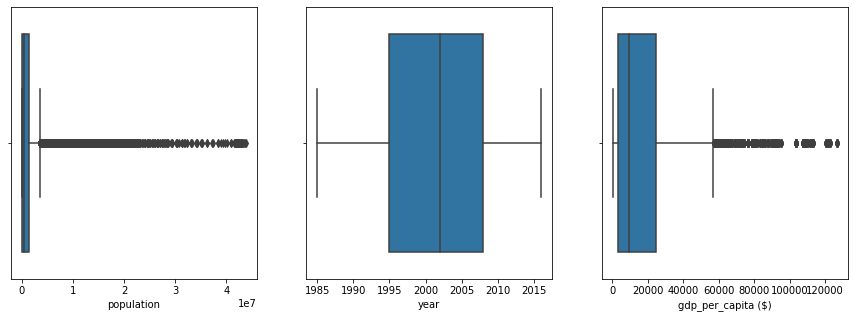

In [27]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.boxplot(numeric_df['population'])
plt.subplot(1,3,2)
sns.boxplot(numeric_df['year'])
plt.subplot(1,3,3)
sns.boxplot(numeric_df['gdp_per_capita ($)'])

plt.show()

In [30]:
sum(numeric_df['year'] == numeric_df['population']) / len(numeric_df)

0.0

Text(0.5, 1.0, 'Suicides vs Year')

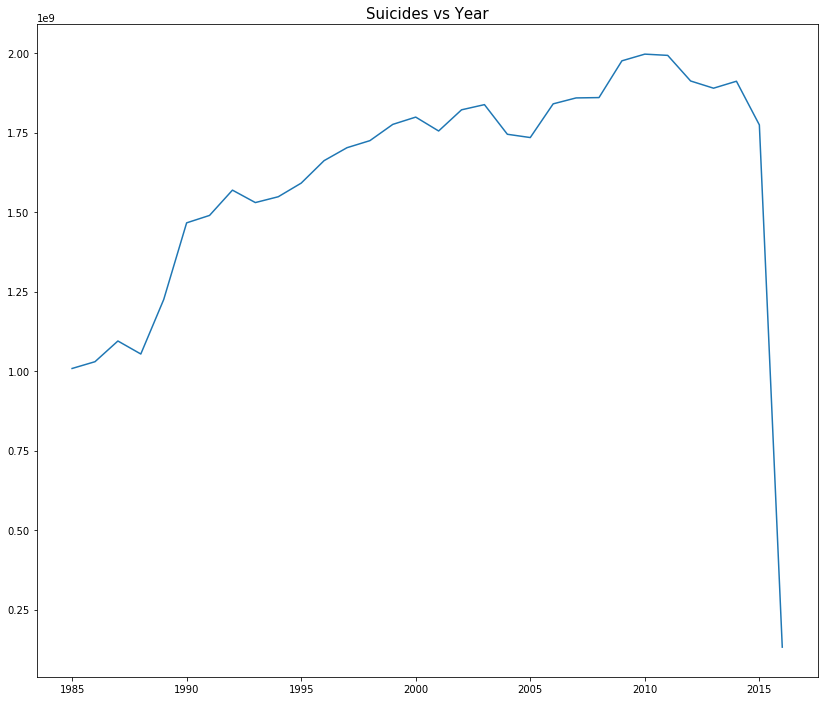

In [40]:
plt.figure(figsize=(14,12))
sns.lineplot(data=df.groupby('year')['population'].sum())
plt.title('Suicides vs Year', fontsize='15')

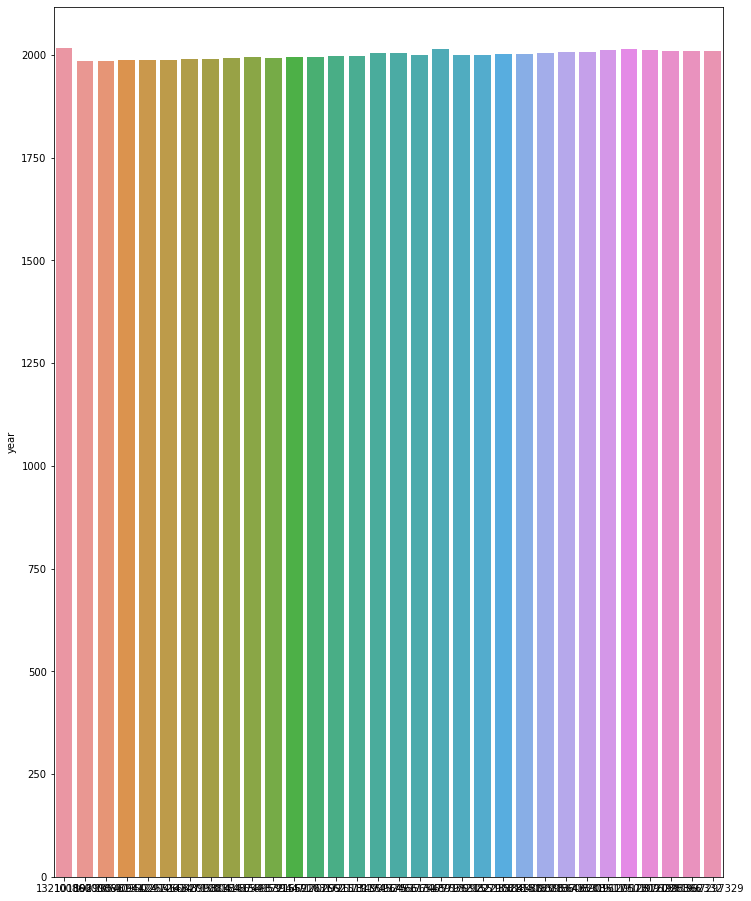

In [42]:
top_ten_reasons =df.groupby('year')['population'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,16))
sns.barplot(y=top_ten_reasons.index, x= top_ten_reasons.values)